<a href="https://colab.research.google.com/github/KondoKoyo/EU_M_Math/blob/main/Chap08_Ex_05%2C07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [7]:
# 8-5
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify = cancer.target , random_state=66)

models = {
    'tree1': DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,random_state=0),
    'tree2': DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state=0),
    'tree3': DecisionTreeClassifier(criterion = 'entropy',max_depth = 10,random_state=0),
    'tree4': DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state=0),
    'tree5': DecisionTreeClassifier(criterion = 'gini',max_depth = 5,random_state=0),
    'tree6': DecisionTreeClassifier(criterion = 'gini',max_depth = 10,random_state=0),

}
scores = {}
for model_name,model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name,'train')] = model.score(X_train,y_train)
    scores[(model_name,'test')] = model.score(X_test,y_test)

pd.Series(scores).unstack()

,test,train
tree1,0.930070,0.971831
tree2,0.902098,0.997653
tree3,0.902098,1.000000
tree4,0.923077,0.974178
tree5,0.895105,1.000000
tree6,0.895105,1.000000


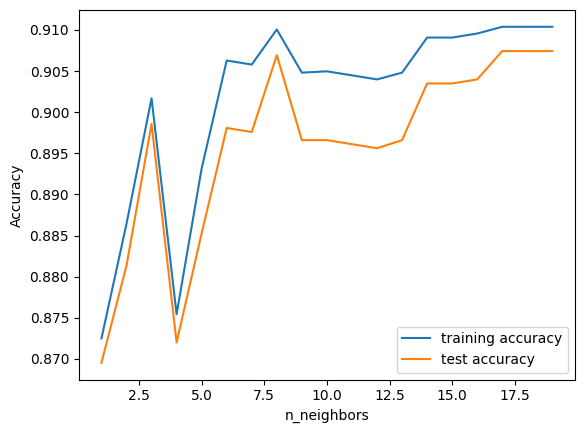

In [15]:
# 8-6
import requests,zipfile
import io

url  = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
r = requests.get(url).content

mush = pd.read_csv(io.StringIO(r.decode('utf-8')),header = None)

mush.columns = [
    'classes','cap_shape','cap_surface','cap_color','odor','bruises','gill_attachment','gill_spacing',
    'gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type',
    'spore_print_color','population','habitat'
]

mush_dummy = pd.get_dummies(mush[['gill_color','gill_attachment','odor','cap_color']])
mush_dummy['flg'] = mush['classes'].map(lambda x: 1 if x == 'p' else 0)

from sklearn.neighbors import KNeighborsClassifier

x = mush_dummy.drop('flg',axis =1)
y = mush_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=50)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label = 'training accuracy')
plt.plot(neighbors_settings,test_accuracy,label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()